# Install ta-lib python wrapper on Google colab

Ta-lib python wrapper : https://github.com/mrjbq7/ta-lib

Dependencies :
> To use TA-Lib for python, you need to have the **TA-Lib already installed**. ...




In [ ]:
# download TA-Lib 
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 

--2018-04-18 02:55:45--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2018-04-18 02:55:45--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2018-04-18 02:55:45--  https://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixnap

In [ ]:
!ls

datalab  ta-lib-0.4.0-src.tar.gz


In [ ]:
!tar xvzf ta-lib-0.4.0-src.tar.gz

In [ ]:
!ls

datalab  ta-lib  ta-lib-0.4.0-src.tar.gz


In [ ]:
import os

In [ ]:
os.chdir('ta-lib') # Can't use !cd in co-lab

In [ ]:
!./configure --prefix=/usr

In [ ]:
!make

In [ ]:
!make install
# wait ~ 30s

In [ ]:
os.chdir('../')

In [ ]:
!ls

datalab  ta-lib  ta-lib-0.4.0-src.tar.gz


In [ ]:
!pip install TA-Lib

    100% |████████████████████████████████| 727kB 1.5MB/s 
  Running setup.py bdist_wheel for TA-Lib ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/2a/2e/ec/71c565b2e0091e03a2b56abfbfd062f14a01a8d7b20ffe8bd5
Successfully built TA-Lib


In [ ]:
import talib

In [ ]:
import pandas as pd

df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo&datatype=csv',
           index_col=0,
           parse_dates=True,
           infer_datetime_format=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator
from datetime import timedelta
from matplotlib.finance import candlestick_ohlc

def plot_pattern(quotes,title,pattern_name,index):
    # quotes : pandas dataframe
    # index : annotation index in 
    # sample : plot_candle2(AP_df,title='Test',pattern_name='Hanging Man',selected_date='2005-04-29',date1='2005-04-07',date2='2005-05-25')        
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
    dayFormatter = DateFormatter('%d')      # e.g., 12
    
    l = quotes.shape[0]
    d1 = index + 16 if index +8 < l else l-1  # 7 day after
    d2 = index - 15 if index - 7 >= 0 else 0 # 7 days before

    # select desired range of dates
    quotes2 = quotes.iloc[range(d2,d1)]
    # print(quotes2.shape)
    
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)
    # ax.xaxis.set_minor_formatter(dayFormatter)

    # plot_day_summary(ax, quotes, ticksize=3)
    candlestick_ohlc(ax, zip(mdates.date2num(quotes2.index.to_pydatetime()),
                         quotes2['open'], quotes2['high'],
                         quotes2['low'], quotes2['close']),
                 width=0.6,colordown='red',colorup='green')

    ax.xaxis_date()
    ax.autoscale_view()
    fig.set_size_inches(10,5)
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(title)
    ymin, ymax = ax.get_ylim()
    selected_date = quotes.iloc[[index]].index.to_pydatetime()
    
    ax.annotate(pattern_name, 
                xy = (selected_date,quotes.loc[selected_date].high ),
                xytext=(selected_date,quotes.loc[selected_date].high + (ymax-ymin)/4 ),
                arrowprops = dict(facecolor='black',width=0.5,shrink=0.25))
    plt.show()

In [ ]:
open = df['open'].values
high = df['high'].values
low = df['low'].values
close = df['close'].values
result = talib.CDLHAMMER(open,high,low,close)


In [ ]:
result

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

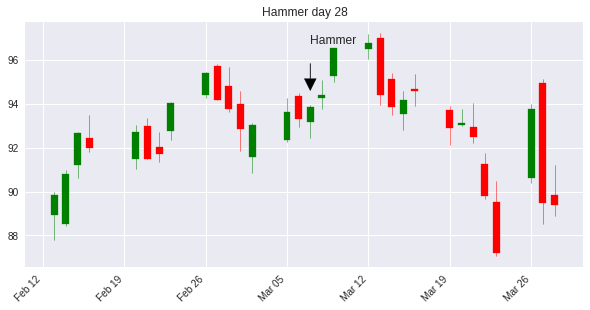

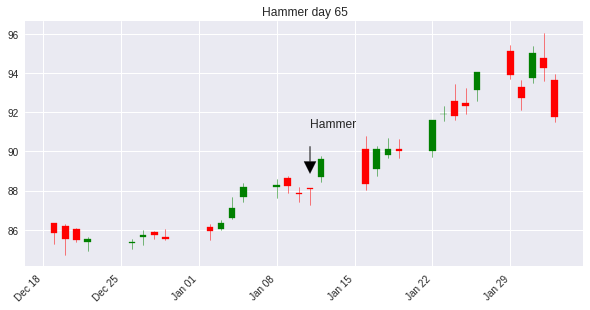

In [ ]:
hammer_days = np.where(result != 0)[0]
for i in hammer_days :
  plot_pattern(df,'Hammer day '+str(i),'Hammer',i)